# Classification Approch

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)
from sklearn.pipeline import Pipeline

#Grid Search
from sklearn.model_selection import GridSearchCV

#Model(s)
from sklearn.neighbors import KNeighborsClassifier


## Work flow
0. [ ] Clean and Engeering Data for X and y
1. [ ] Split Data in Train/Test for X and y
2. [ ] Scaler on Training X & X test
3. [ ] Create Model(s)
4. [ ] Create Pipeline and HyperParameters
5. [ ] Fit/Train Model(s) on X Train
6. [ ] Evaluate Model(s) on X test
7. [ ] Adjust Param as Necessary
8. [ ] Bonus: Save Model(s)

In [2]:
filename = 'knn.pkl' #import model approch for  joblib

### PreProcess


In [3]:
names = ['wifi 1', 'wifi 2', 'wifi 3', 'wifi 4', 'wifi 5', 'wifi 6', 'wifi 7', 'room']
df= pd.read_csv('../wifi_localization.txt',names=names,sep='\t')
df

,wifi 1,wifi 2,wifi 3,wifi 4,wifi 5,wifi 6,wifi 7,room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


#### Clean and Engeering Data

#### Split Data in Train/Test for X and y


In [4]:
X = df.drop(['room'],axis=1)
y = df['room']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=1099, stratify=y)


### Model

In [7]:
knn = KNeighborsClassifier()
pipe = Pipeline([('knn',knn)])

In [6]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [8]:
#hyp param value
n_neighbors =[1,3,5,7,9]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

In [19]:

hyp_param={
    'knn__n_neighbors' : n_neighbors,
    'knn__algorithm' : algorithm
}

In [20]:
full_model = GridSearchCV(estimator=pipe,
                          param_grid=hyp_param,
                          cv=5,
                          verbose=2                         )

#### Create Model(s)

#### Train Model

In [21]:
full_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ............knn__algorithm=auto, knn__n_neighbors=1; total time=   0.0s
[CV] END ............knn__algorithm=auto, knn__n_neighbors=1; total time=   0.0s
[CV] END ............knn__algorithm=auto, knn__n_neighbors=1; total time=   0.0s
[CV] END ............knn__algorithm=auto, knn__n_neighbors=1; total time=   0.0s
[CV] END ............knn__algorithm=auto, knn__n_neighbors=1; total time=   0.0s
[CV] END ............knn__algorithm=auto, knn__n_neighbors=3; total time=   0.0s
[CV] END ............knn__algorithm=auto, knn__n_neighbors=3; total time=   0.0s
[CV] END ............knn__algorithm=auto, knn__n_neighbors=3; total time=   0.0s
[CV] END ............knn__algorithm=auto, knn__n_neighbors=3; total time=   0.0s
[CV] END ............knn__algorithm=auto, knn__n_neighbors=3; total time=   0.0s
[CV] END ............knn__algorithm=auto, knn__n_neighbors=5; total time=   0.0s
[CV] END ............knn__algorithm=auto, knn__

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__n_neighbors': [1, 3, 5, 7, 9]},
             verbose=2)

### Evaluate model

#### Test On data

In [22]:
y_pred = full_model.predict(X_test)

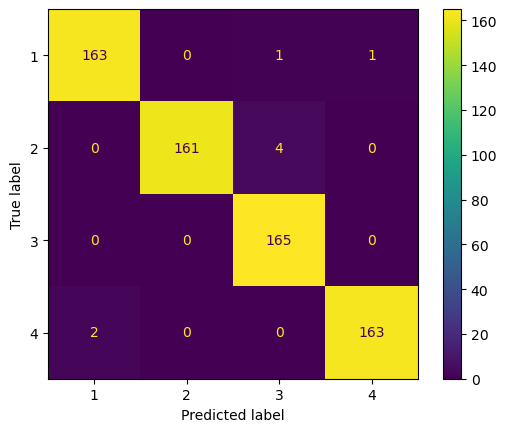

In [25]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=full_model.classes_).plot()

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       165
           2       1.00      0.98      0.99       165
           3       0.97      1.00      0.99       165
           4       0.99      0.99      0.99       165

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660



### Final Model(s)


In [27]:
full_model.best_params_

{'knn__algorithm': 'ball_tree', 'knn__n_neighbors': 1}

In [ ]:
final=KNeighborsClassifier(n_neighbors=1,
                          algorithm='ball_tree')

#### Train on all Data 


##### no need

#### Save with joblib

In [22]:
import joblib
joblib.dump(value=final,filename='knn.pkl')

# Congratulations!!!

#### Created and trained by  Matin1099.
